In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_squared_log_error,make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler



In [2]:
bike_df = pd.read_csv('london_bike.csv')
bike_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [11]:
bike_df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [15]:
bike_df['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

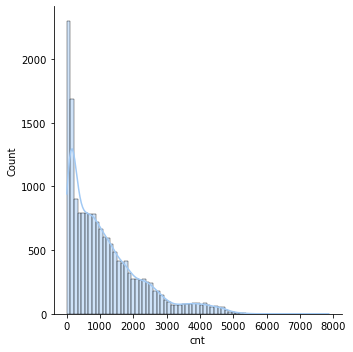

In [16]:
sns.displot(data=bike_df,x='cnt',kde=True)

In [17]:
bike_df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [18]:
bike_df['timestamp'] = bike_df.timestamp.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [19]:
bike_df['year'] = bike_df.timestamp.apply(lambda x : x.year)
bike_df['month'] = bike_df.timestamp.apply(lambda x : x.month)
bike_df['day'] = bike_df.timestamp.apply(lambda x : x.day)
bike_df['hour'] = bike_df.timestamp.apply(lambda x: x.hour)
print(bike_df.info())
bike_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  hour          17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB
None


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015,1,4,2


In [20]:
bike_df.drop('timestamp',axis = 1,inplace = True)

<AxesSubplot:>

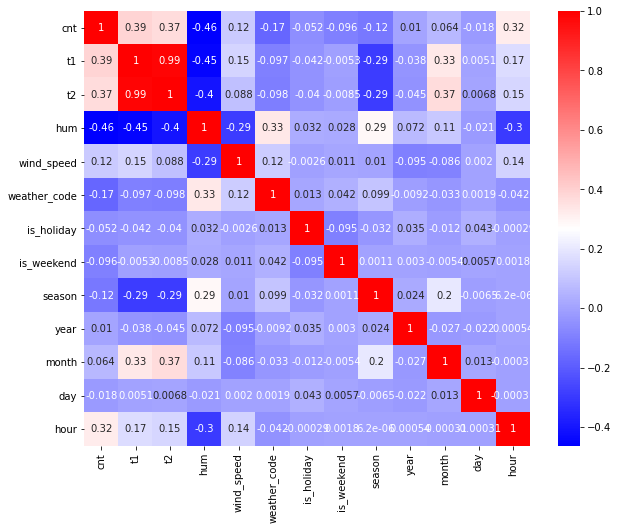

In [21]:
plt.figure(figsize=(10,8))
corr = bike_df.corr()
sns.heatmap(corr,cmap='bwr',annot=True)

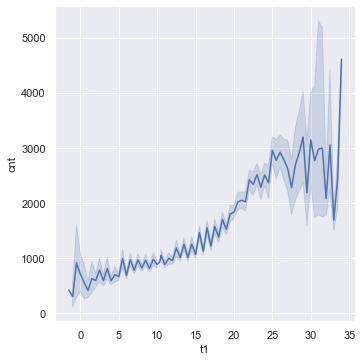

In [22]:
sns.set()
sns.relplot(data=bike_df,x='t1',y='cnt',kind='line')

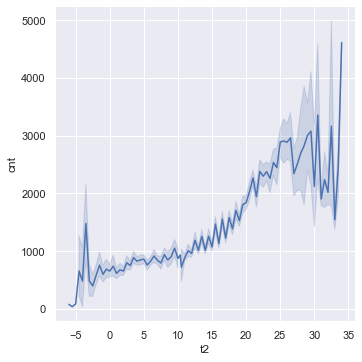

In [23]:
sns.relplot(data=bike_df,x='t2',y='cnt',kind='line')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

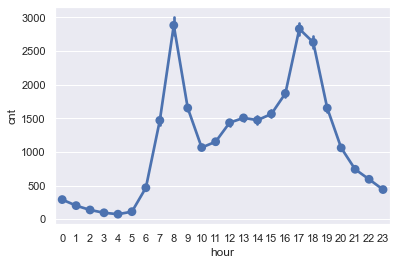

In [24]:
sns.pointplot(data=bike_df,x='hour',y='cnt')

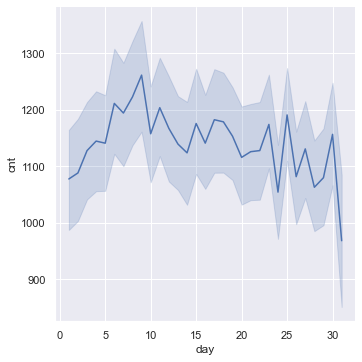

In [25]:
sns.relplot(data=bike_df,x='day',y='cnt',kind='line')

<AxesSubplot:xlabel='month', ylabel='cnt'>

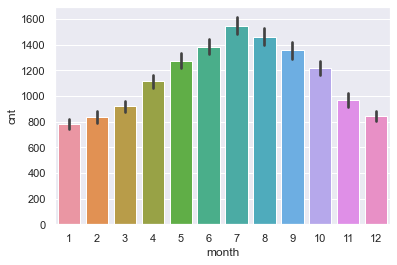

In [26]:
sns.set_palette('pastel')
sns.barplot(data=bike_df,x='month',y='cnt')

<AxesSubplot:xlabel='season', ylabel='cnt'>

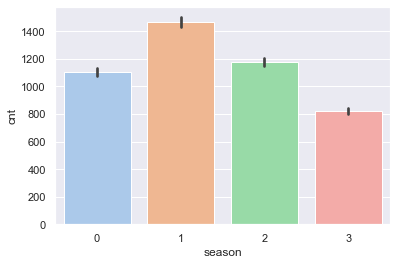

In [27]:
sns.barplot(data=bike_df,x='season',y='cnt')

<AxesSubplot:xlabel='is_weekend', ylabel='cnt'>

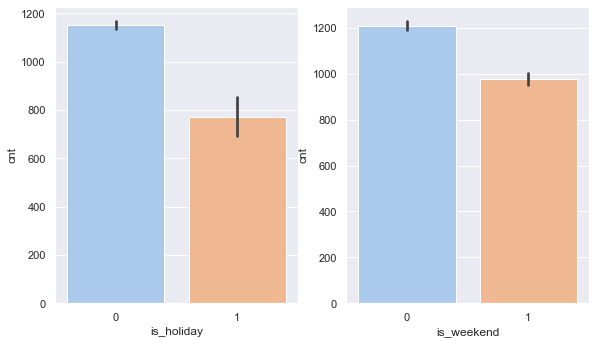

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.barplot(data=bike_df,x='is_holiday',y='cnt')
plt.subplot(2,4,2)
sns.barplot(data=bike_df,x='is_weekend',y='cnt')

<AxesSubplot:xlabel='weather_code', ylabel='count'>

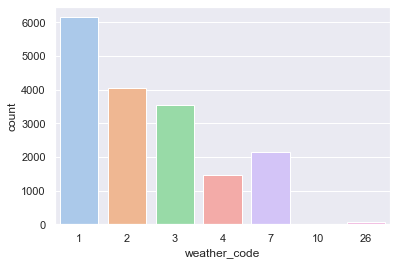

In [29]:
sns.countplot(data=bike_df,x='weather_code')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

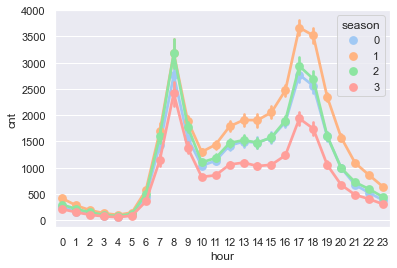

In [30]:
# 시간과 계절별 이용
sns.pointplot(data=bike_df,x='hour',y='cnt',hue='season')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

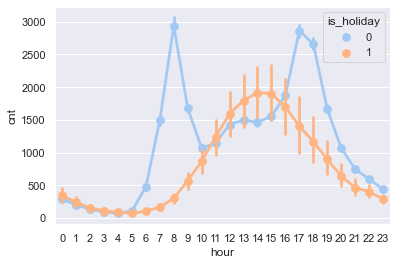

In [31]:
# 시간별 휴일/평일 이용
sns.pointplot(data=bike_df,x='hour',y='cnt',hue='is_holiday')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

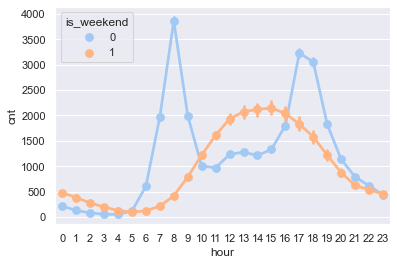

In [32]:
# 시간별 주말/주중 이용
sns.pointplot(data=bike_df,x='hour',y='cnt',hue='is_weekend')

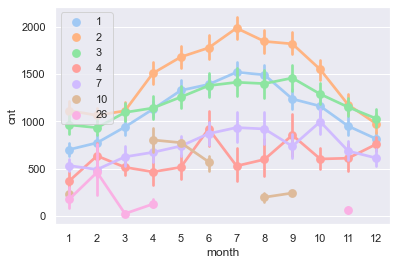

In [33]:
# 월별 weather_code
sns.pointplot(data=bike_df,x='month',y='cnt',hue='weather_code')
plt.legend(loc='best')

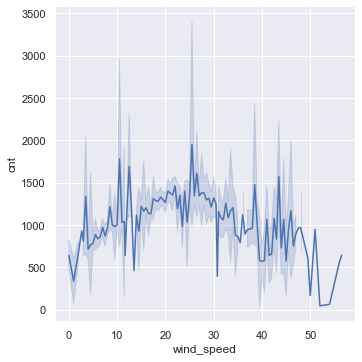

In [34]:
# 풍속
sns.set()
sns.relplot(data=bike_df,x='wind_speed',y='cnt',kind='line')

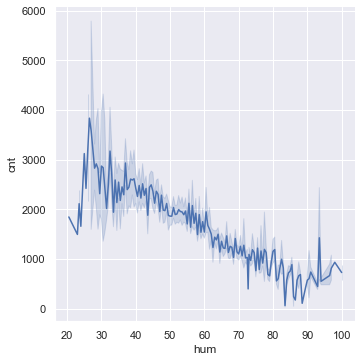

In [35]:
# 습도
sns.relplot(data=bike_df,x='hum',y='cnt',kind='line')

# Machine Learning_인프런

In [3]:
bike_df = pd.read_csv('london_bike.csv')

In [4]:
bike_df['timestamp'] = bike_df.timestamp.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [5]:
bike_df['year'] = bike_df.timestamp.apply(lambda x : x.year)
bike_df['month'] = bike_df.timestamp.apply(lambda x : x.month)
bike_df['day'] = bike_df.timestamp.apply(lambda x : x.day)
bike_df['hour'] = bike_df.timestamp.apply(lambda x: x.hour)
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  hour          17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB
None


In [6]:
bike_df.drop('timestamp',axis = 1,inplace = True)

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  int64  
 6   is_holiday    17414 non-null  int64  
 7   is_weekend    17414 non-null  int64  
 8   season        17414 non-null  int64  
 9   year          17414 non-null  int64  
 10  month         17414 non-null  int64  
 11  day           17414 non-null  int64  
 12  hour          17414 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [8]:
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [9]:
X = bike_df.drop('cnt',axis=1,inplace=False)
y = bike_df['cnt']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

evaluate_regr(y_test,y_pred)

RMSLE: 1.131, RMSE: 918.184, MAE: 665.037


<ipython-input-8-57d2ac59a203>:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [11]:
r2_test = r2_score(y_test,y_pred)
print(r2_test)
print(linear_reg.score(X_test,y_test))

0.29226606509222564
0.29226606509222564


<AxesSubplot:>

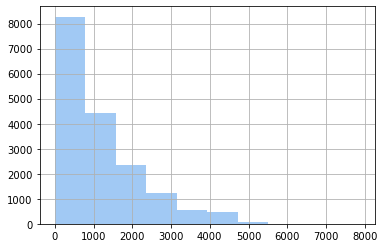

In [12]:
y.hist()

<AxesSubplot:>

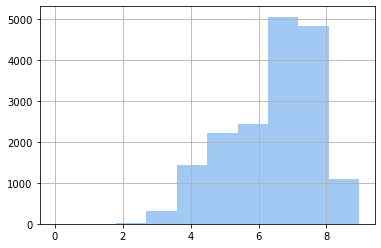

In [13]:
y_log = np.log1p(y)
y_log.hist()

In [14]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_log = np.log1p(y)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(y_pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 0.977, RMSE: 1020.844, MAE: 651.762


<AxesSubplot:>

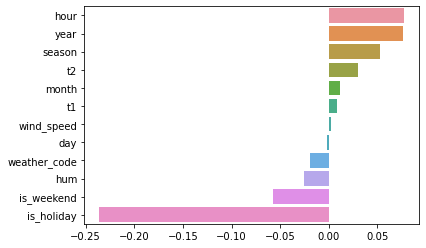

In [15]:
coef = pd.Series(linear_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [16]:
# 원-핫 인코딩
X_ohe = pd.get_dummies(X,columns=['year','month','hour','season','weather_code','is_holiday','is_weekend'])

In [17]:
X_ohe

,t1,t2,hum,wind_speed,day,year_2015,year_2016,year_2017,month_1,month_2,...,weather_code_2,weather_code_3,weather_code_4,weather_code_7,weather_code_10,weather_code_26,is_holiday_0,is_holiday_1,is_weekend_0,is_weekend_1
0,3.0,2.0,93.0,6.0,4,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,3.0,2.5,93.0,5.0,4,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,2.5,2.5,96.5,0.0,4,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,2.0,2.0,100.0,0.0,4,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,2.0,0.0,93.0,6.5,4,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,5.0,1.0,81.0,19.0,3,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
17410,5.0,1.0,81.0,21.0,3,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
17411,5.5,1.5,78.5,24.0,3,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
17412,5.5,1.5,76.0,23.0,3,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_log, test_size=0.3, random_state=42)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)


linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)


for model in [linear_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.522, RMSE: 601.662, MAE: 362.974
### Ridge ###
RMSLE: 0.523, RMSE: 609.128, MAE: 366.471
### Lasso ###
RMSLE: 0.589, RMSE: 719.205, MAE: 431.845


<AxesSubplot:>

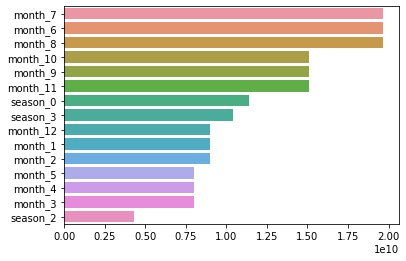

In [19]:
coef = pd.Series(linear_reg.coef_ , index=X_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:15]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

# Random Forest Regression

In [29]:
rf_reg = RandomForestRegressor(max_depth=15,n_estimators=500)
dt_reg = DecisionTreeRegressor(max_depth=10)

for model in [rf_reg,dt_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.343, RMSE: 415.419, MAE: 250.229
### DecisionTreeRegressor ###
RMSLE: 0.528, RMSE: 645.924, MAE: 403.634


In [21]:
from sklearn.model_selection import learning_curve, validation_curve

In [22]:
forest_reg = RandomForestRegressor(max_depth=10, n_estimators=10)
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg, X=X_train, y=y_train, cv=5)

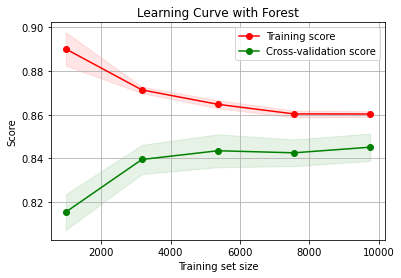

In [23]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Learning Curve with Forest")
plt.xlabel(r"Training set size")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color='g')
plt.show()

In [24]:
forest_reg = RandomForestRegressor(max_depth=10, n_estimators=10)
param_range = np.arange(1, 16, 3)

train_scores, test_scores = validation_curve(estimator=forest_reg, X=X_train, y=y_train, cv=5, param_name='max_depth', param_range=param_range)

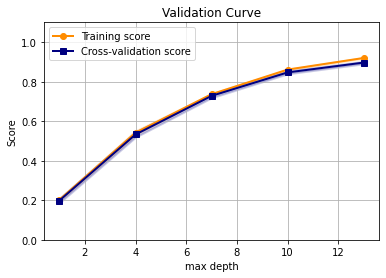

In [25]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"max depth")
plt.ylabel("Score")
plt.grid()
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", marker='o', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", marker='s', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Decision Tree Regression

In [196]:
bike_df = pd.read_csv('london_bike.csv')

In [197]:
bike_df['timestamp'] = bike_df.timestamp.apply(pd.to_datetime)

In [198]:
bike_df['year'] = bike_df.timestamp.apply(lambda x : x.year)
bike_df['month'] = bike_df.timestamp.apply(lambda x : x.month)
bike_df['day'] = bike_df.timestamp.apply(lambda x : x.day)
bike_df['hour'] = bike_df.timestamp.apply(lambda x: x.hour)

In [199]:
bike_df.drop('timestamp',axis = 1,inplace = True)

In [200]:
X = bike_df.drop('cnt',axis=1,inplace=False)
y = bike_df['cnt']

In [201]:
X_ohe = pd.get_dummies(X,columns=['year','month','hour','season','weather_code','is_holiday','is_weekend'])

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

evaluate_regr(y_test,y_pred)

RMSLE: 0.314, RMSE: 311.485, MAE: 178.669


In [203]:
param_range = np.arange(1, 16, 3)

train_scores, test_scores = validation_curve(estimator=tree_reg, X=X_train, y=y_train, cv=5, param_name='max_depth', param_range=param_range)

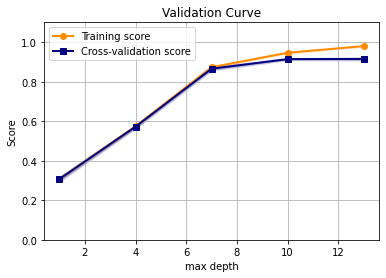

In [204]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"max depth")
plt.ylabel("Score")
plt.grid()
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", marker='o', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", marker='s', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()